In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pandas as pd
from scipy import optimize, stats

In [2]:
def fit_exp(x, a, b, c):
    return a * np.exp(-x/b) + c

In [3]:
file_name = 'wt_decay_0mvIV.xlsx'
sheet_number = 0 
df = pd.read_excel(file_name, sheet_number)

In [4]:
df_in_np = df.to_numpy()
x_vals = [row[0] for row in df_in_np]
y_vals = [row[1] for row in df_in_np]

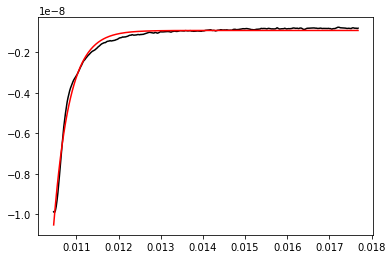

In [23]:
plt.figure()
popt, pcov = optimize.curve_fit(fit_exp, x_vals, y_vals)
y_to_plot = [fit_exp(x, *popt) for x in x_vals]
plt.plot(x_vals, y_vals, color="black")
plt.plot(x_vals, y_to_plot, color="red")

In [6]:
"""
The following code calculates mean and std of tau across 
    different recordings
"""

'\nThe following code calculates mean and std of tau across \n    different recordings\n'

In [36]:
def get_tau_at_sheet_wt(i):
    plt.figure()
    file_name = 'wt_decay_0mvIV.xlsx'
    df = pd.read_excel(file_name, i)
    df_in_np = df.to_numpy()
    x_vals = [row[0] for row in df_in_np]
    y_vals = [row[1] for row in df_in_np]
    popt, pcov = optimize.curve_fit(fit_exp, x_vals, y_vals, maxfev = 3000)
    y_to_plot = [fit_exp(x, *popt) for x in x_vals]
    plt.plot(x_vals, y_vals, color="black")
    plt.plot(x_vals, y_to_plot, color="red")
    plt.text(0.5,0.3,"tau = " + str(popt[1]),transform=plt.gca().transAxes, c = 'blue')
    plt.title("plot " + str(i) + " for WT")
    return popt[1]

In [37]:
def get_tau_at_sheet_mut(i):
    #print('AT ' + str(i))
    plt.figure()
    file_name = 'mut_decay_0mvIV.xlsx'
    df = pd.read_excel(file_name, i)
    df_in_np = df.to_numpy()
    x_vals = [row[0] for row in df_in_np]
    y_vals = [row[1] for row in df_in_np]
    popt, pcov = optimize.curve_fit(fit_exp, x_vals, y_vals)
    y_to_plot = [fit_exp(x, *popt) for x in x_vals]
    plt.plot(x_vals, y_vals, color="black")
    plt.plot(x_vals, y_to_plot, color="red")
    plt.text(0.5,0.3,"tau = " + str(popt[1]),transform=plt.gca().transAxes, c = 'blue')
    plt.title("plot " + str(i) + " for MUT")
    return popt[1]

In [38]:
xl = pd.ExcelFile('wt_decay_0mvIV.xlsx')
wt_len = len(xl.sheet_names)
xl = pd.ExcelFile('mut_decay_0mvIV.xlsx')
mut_len = len(xl.sheet_names)

<ipython-input-37-c43d2c93ea73>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


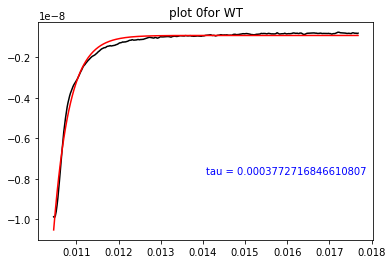

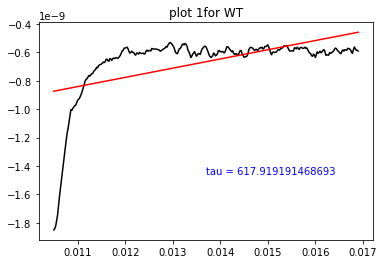

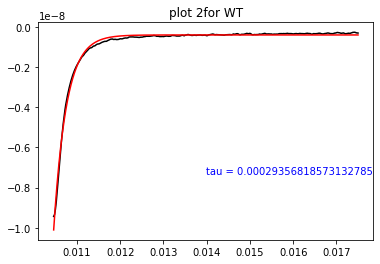

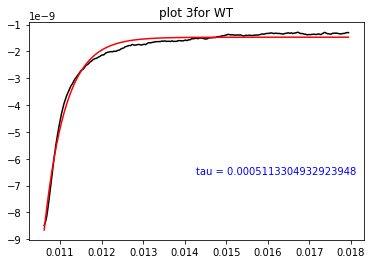

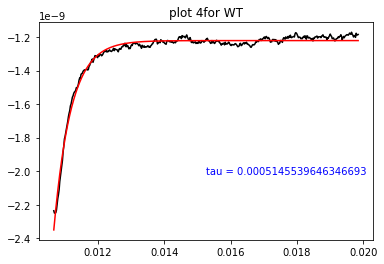

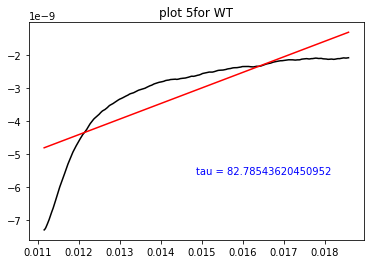

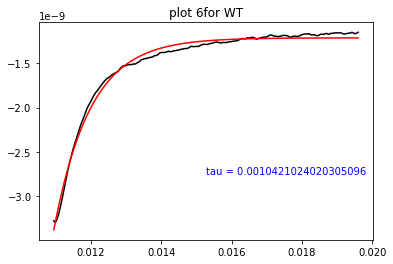

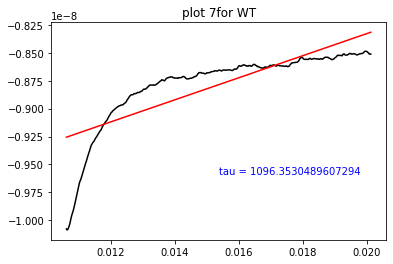

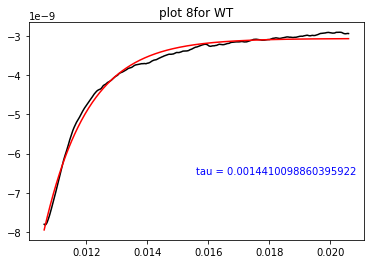

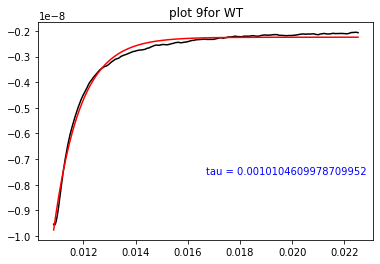

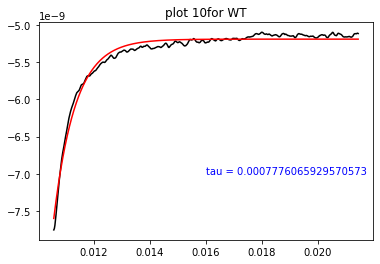

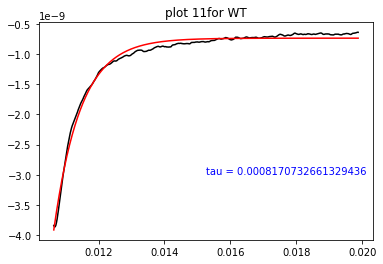

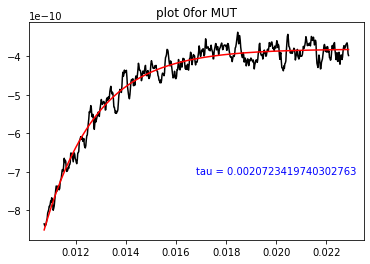

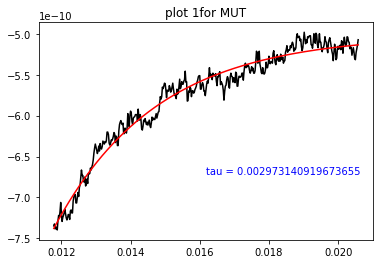

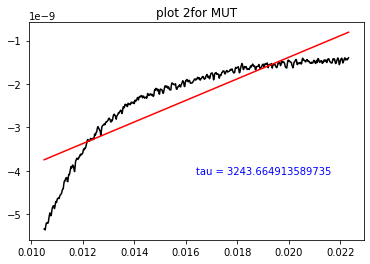

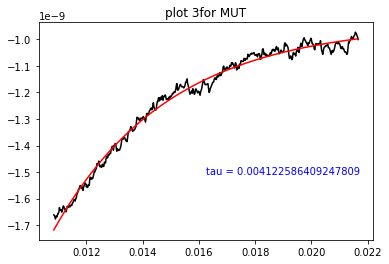

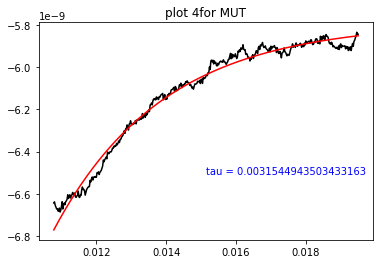

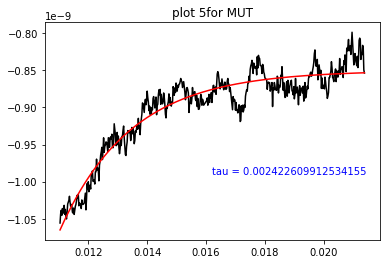

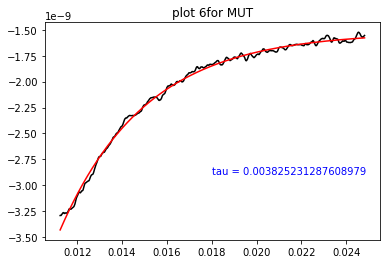

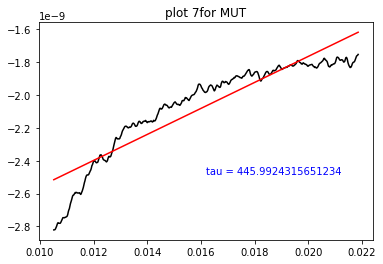

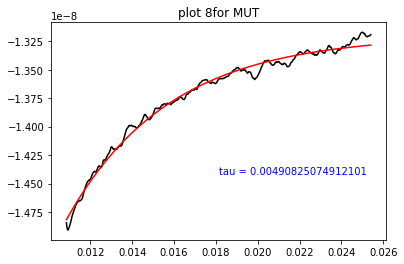

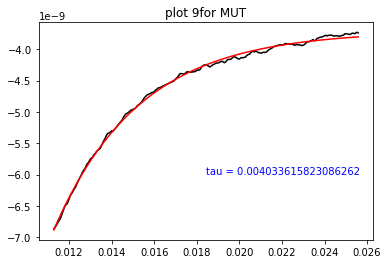

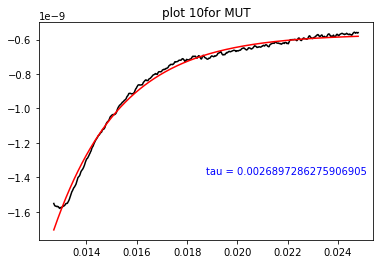

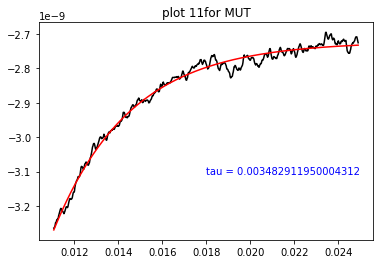

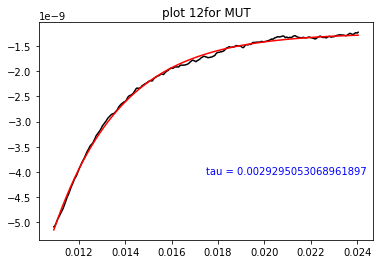

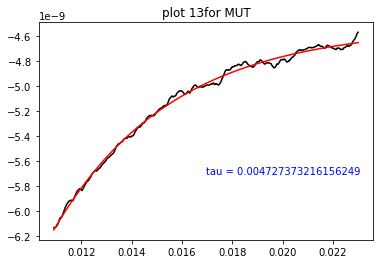

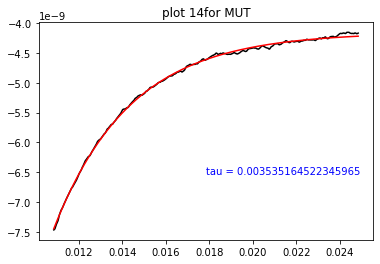

In [39]:
wt_taus = [get_tau_at_sheet_wt(i) for i in range(wt_len)]
mut_taus = [get_tau_at_sheet_mut(i) for i in range(mut_len)]

In [11]:
std_mut = np.std(mut_taus)
std_wt = np.std(wt_taus)

mean_mut = np.mean(mut_taus)
mean_wt = np.mean(wt_taus)

In [12]:
print("WT mean and STD are: " + str(mean_wt) + ", " + str(std_wt))
print("MUT mean and STD are: " + str(mean_mut) + ", " + str(std_mut))

WT mean and STD are: 149.75537180095043, 331.8568349712595
MUT mean and STD are: 245.98014814066045, 808.8130324387168
